Customer Segmentation

Data injestion,basic info

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df=pd.read_csv('customer_segmentation_data.csv')
df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08


In [28]:
df.drop('id',axis=1,inplace=True)

In [4]:
df.shape

(1000, 8)

In [5]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   1000 non-null   int64  
 1   gender                1000 non-null   object 
 2   income                1000 non-null   int64  
 3   spending_score        1000 non-null   int64  
 4   membership_years      1000 non-null   int64  
 5   purchase_frequency    1000 non-null   int64  
 6   preferred_category    1000 non-null   object 
 7   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(5), object(2)
memory usage: 62.6+ KB


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   1000 non-null   int64  
 1   gender                1000 non-null   object 
 2   income                1000 non-null   int64  
 3   spending_score        1000 non-null   int64  
 4   membership_years      1000 non-null   int64  
 5   purchase_frequency    1000 non-null   int64  
 6   preferred_category    1000 non-null   object 
 7   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(5), object(2)
memory usage: 62.6+ KB


In [7]:
df.isnull().sum()

age                     0
gender                  0
income                  0
spending_score          0
membership_years        0
purchase_frequency      0
preferred_category      0
last_purchase_amount    0
dtype: int64

EDA

<Axes: ylabel='spending_score'>

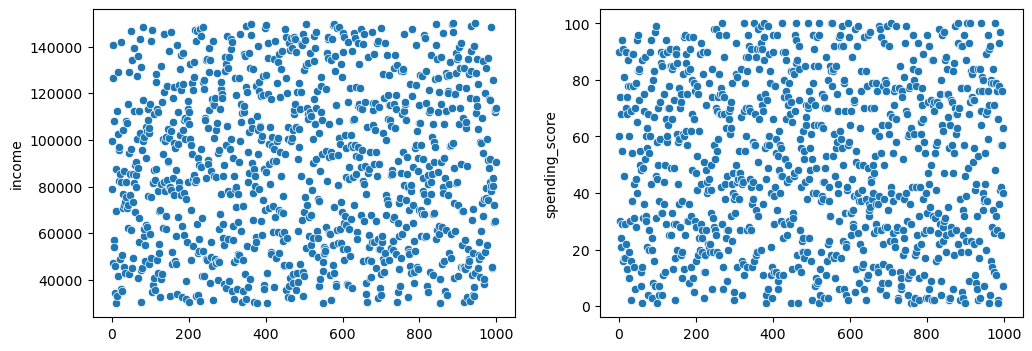

In [8]:

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.scatterplot(df['income'])
plt.subplot(1,2,2)
sns.scatterplot(df['spending_score'])

<Axes: ylabel='spending_score'>

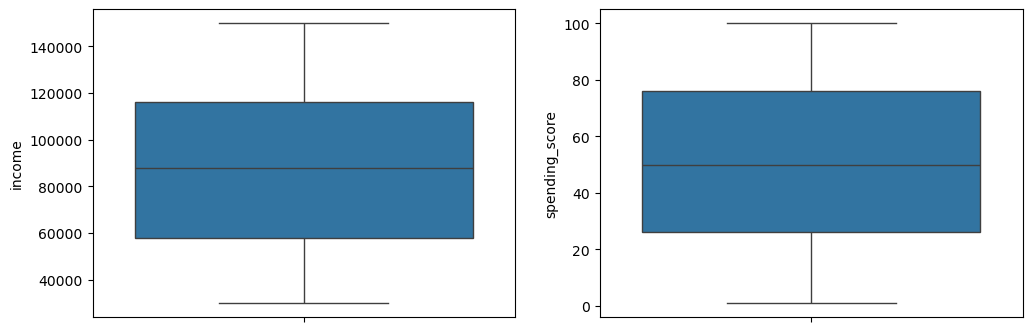

In [9]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(df['income'])
plt.subplot(1,2,2)
sns.boxplot(df['spending_score'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_12216\3881901636.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['income'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_12216\3881901636.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['spending_score'])


<Axes: xlabel='spending_score', ylabel='Density'>

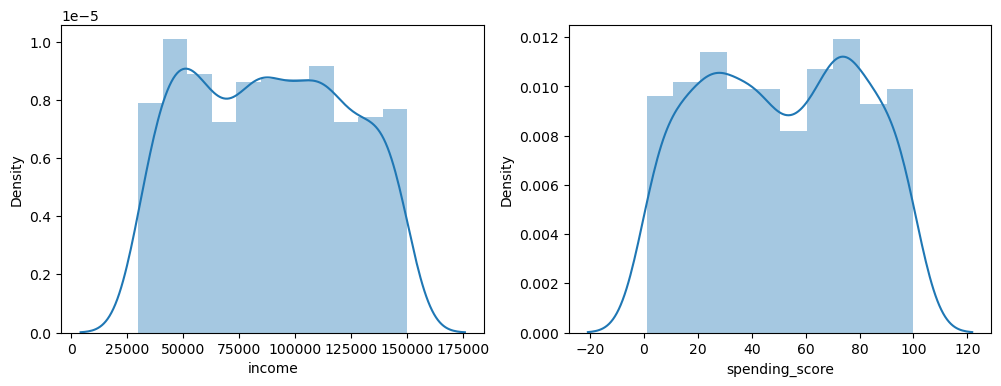

In [10]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(df['income'])
plt.subplot(1,2,2)
sns.distplot(df['spending_score'])


In [23]:
df['gender'].value_counts()

gender
Male      357
Other     327
Female    316
Name: count, dtype: int64

In [24]:
df['preferred_category'].value_counts()

preferred_category
Electronics      215
Sports           210
Home & Garden    206
Groceries        199
Clothing         170
Name: count, dtype: int64

Data Preprocessing


In [29]:
df=pd.get_dummies(df,columns=['gender','preferred_category'])
df=df.astype(int)


In [30]:
df

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,gender_Female,gender_Male,gender_Other,preferred_category_Clothing,preferred_category_Electronics,preferred_category_Groceries,preferred_category_Home & Garden,preferred_category_Sports
0,38,99342,90,3,24,113,1,0,0,0,0,1,0,0
1,21,78852,60,2,42,41,1,0,0,0,0,0,0,1
2,60,126573,30,2,28,424,1,0,0,1,0,0,0,0
3,40,47099,74,9,5,991,0,0,1,0,0,0,1,0
4,65,140621,21,3,25,347,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,57,112170,57,6,1,313,0,1,0,1,0,0,0,0
996,23,65337,76,10,23,632,0,0,1,0,0,1,0,0
997,23,113097,40,5,42,75,0,1,0,0,0,0,0,1
998,22,113695,63,7,44,505,1,0,0,0,1,0,0,0


In [31]:
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder
sc=StandardScaler()
scaled_data=sc.fit_transform(df)

In [32]:
scaled_data

array([[-0.38464377,  0.31686767,  1.35846776, ...,  2.00627157,
        -0.50935827, -0.51558005],
       [-1.51536211, -0.28201608,  0.32186512, ..., -0.49843701,
        -0.50935827,  1.93956303],
       [ 1.07863878,  1.11277804, -0.71473752, ..., -0.49843701,
        -0.50935827, -0.51558005],
       ...,
       [-1.38233643,  0.71890017, -0.36920331, ..., -0.49843701,
        -0.50935827,  1.93956303],
       [-1.44884927,  0.73637858,  0.42552539, ..., -0.49843701,
        -0.50935827, -0.51558005],
       [-0.51766946,  0.05609457, -1.50946622, ...,  2.00627157,
        -0.50935827, -0.51558005]])

In [33]:
df

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,gender_Female,gender_Male,gender_Other,preferred_category_Clothing,preferred_category_Electronics,preferred_category_Groceries,preferred_category_Home & Garden,preferred_category_Sports
0,38,99342,90,3,24,113,1,0,0,0,0,1,0,0
1,21,78852,60,2,42,41,1,0,0,0,0,0,0,1
2,60,126573,30,2,28,424,1,0,0,1,0,0,0,0
3,40,47099,74,9,5,991,0,0,1,0,0,0,1,0
4,65,140621,21,3,25,347,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,57,112170,57,6,1,313,0,1,0,1,0,0,0,0
996,23,65337,76,10,23,632,0,0,1,0,0,1,0,0
997,23,113097,40,5,42,75,0,1,0,0,0,0,0,1
998,22,113695,63,7,44,505,1,0,0,0,1,0,0,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   age                               1000 non-null   int32
 1   income                            1000 non-null   int32
 2   spending_score                    1000 non-null   int32
 3   membership_years                  1000 non-null   int32
 4   purchase_frequency                1000 non-null   int32
 5   last_purchase_amount              1000 non-null   int32
 6   gender_Female                     1000 non-null   int32
 7   gender_Male                       1000 non-null   int32
 8   gender_Other                      1000 non-null   int32
 9   preferred_category_Clothing       1000 non-null   int32
 10  preferred_category_Electronics    1000 non-null   int32
 11  preferred_category_Groceries      1000 non-null   int32
 12  preferred_category_Home & Garden  1

Data Preparation

In [35]:
#x=scaled_data.iloc[:,[2,3]]#for dataframe
x=scaled_data[:,[1,2]]
_x=scaled_data[:,[0,1,2,4,5,]]
_x

array([[-0.38464377,  0.31686767,  1.35846776, -0.18234781, -1.28163484],
       [-1.51536211, -0.28201608,  0.32186512,  1.08200524, -1.52520419],
       [ 1.07863878,  1.11277804, -0.71473752,  0.09861954, -0.22955058],
       ...,
       [-1.38233643,  0.71890017, -0.36920331,  1.08200524, -1.41018533],
       [-1.44884927,  0.73637858,  0.42552539,  1.22248891,  0.04446494],
       [-0.51766946,  0.05609457, -1.50946622,  0.30934505,  0.59926178]])

Model

2 feature

In [36]:
from sklearn.cluster import KMeans,DBSCAN

In [37]:
wcss=[]
for i in range(2,11):
    kmean=KMeans(n_clusters=i,init="k-means++")
    kmean.fit(x)
    wcss.append(kmean.inertia_)
    

In [38]:
wcss

[1253.3098833028569,
 789.8590530146304,
 488.23791261628264,
 419.02357038494347,
 358.55819526129886,
 291.6617777078757,
 259.3221826263188,
 229.0963882196923,
 201.5958801281266]

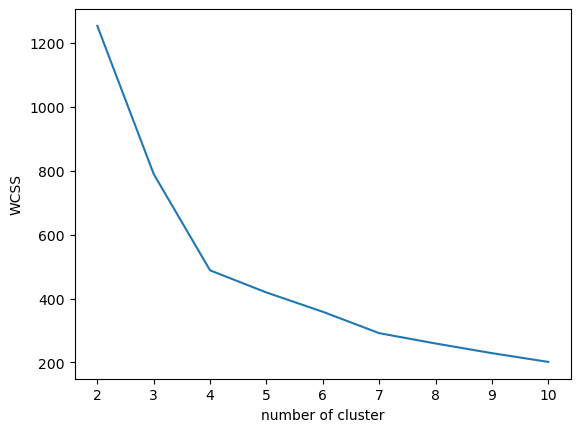

In [39]:
plt.plot(range(2,11),wcss)
plt.xticks(range(2,11))
plt.xlabel("number of cluster")
plt.ylabel("WCSS")
plt.show()

In [40]:
from kneed import KneeLocator
k=KneeLocator(range(2,11),wcss,curve='convex',direction='decreasing')
k.elbow

4

In [41]:
model=KMeans(n_clusters=4,init='k-means++')
model.fit(x)

KMeans(n_clusters=4)

In [42]:
y=model.predict(x)
y

array([1, 3, 2, 3, 2, 0, 3, 1, 0, 3, 0, 3, 3, 0, 2, 2, 2, 0, 1, 1, 0, 3,
       3, 3, 3, 1, 0, 0, 3, 2, 0, 3, 0, 3, 3, 0, 1, 3, 0, 2, 0, 1, 0, 3,
       0, 2, 2, 3, 3, 1, 3, 1, 1, 3, 3, 3, 0, 2, 0, 2, 0, 3, 3, 0, 2, 1,
       1, 3, 1, 0, 3, 0, 2, 1, 1, 1, 0, 0, 2, 3, 1, 1, 1, 3, 2, 0, 0, 0,
       2, 3, 2, 1, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3, 3, 2, 0, 2, 3, 3, 3, 3,
       2, 3, 0, 0, 2, 1, 2, 0, 1, 0, 2, 3, 0, 3, 3, 3, 3, 3, 3, 2, 3, 1,
       1, 3, 1, 2, 3, 1, 2, 3, 3, 0, 1, 3, 2, 2, 2, 1, 3, 2, 1, 0, 3, 0,
       1, 1, 3, 0, 1, 0, 2, 1, 3, 2, 2, 0, 3, 3, 3, 3, 2, 2, 1, 3, 3, 3,
       2, 1, 1, 2, 3, 2, 3, 0, 1, 1, 2, 0, 1, 3, 1, 2, 0, 3, 3, 2, 3, 1,
       0, 2, 2, 0, 2, 2, 1, 2, 3, 3, 2, 2, 3, 0, 2, 0, 1, 2, 0, 2, 3, 1,
       3, 0, 2, 0, 2, 0, 3, 0, 3, 0, 2, 2, 2, 2, 0, 3, 0, 2, 2, 2, 0, 1,
       2, 1, 2, 0, 0, 3, 1, 2, 2, 1, 2, 1, 1, 3, 2, 3, 3, 3, 1, 0, 1, 3,
       1, 3, 2, 2, 1, 3, 0, 2, 3, 1, 1, 0, 2, 0, 1, 3, 0, 0, 2, 0, 2, 1,
       1, 1, 3, 3, 0, 3, 3, 2, 1, 2, 2, 2, 0, 2, 2,

In [43]:
data=pd.DataFrame(x,y)
data.index.value_counts()

3    284
2    278
0    222
1    216
Name: count, dtype: int64

In [44]:
data

,0,1
1,0.316868,1.358468
3,-0.282016,0.321865
2,1.112778,-0.714738
3,-1.210096,0.805613
2,1.523374,-1.025718
...,...,...
1,0.691806,0.218205
3,-0.677034,0.874720
2,0.718900,-0.369203
1,0.736379,0.425525


In [45]:
df['cluster'] = model.labels_
cluster_counts = df['cluster'].value_counts().sort_index()
cluster_percent = (cluster_counts / len(df)) * 100
centroids=model.cluster_centers_
total = len(df)
cluster_counts = df['cluster'].value_counts().sort_index()
cluster_counts
cluster_percent = (cluster_counts / total) * 100
print(cluster_percent.round(2))




cluster
0    22.2
1    21.6
2    27.8
3    28.4
Name: count, dtype: float64


In [46]:
df

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,gender_Female,gender_Male,gender_Other,preferred_category_Clothing,preferred_category_Electronics,preferred_category_Groceries,preferred_category_Home & Garden,preferred_category_Sports,cluster
0,38,99342,90,3,24,113,1,0,0,0,0,1,0,0,1
1,21,78852,60,2,42,41,1,0,0,0,0,0,0,1,3
2,60,126573,30,2,28,424,1,0,0,1,0,0,0,0,2
3,40,47099,74,9,5,991,0,0,1,0,0,0,1,0,3
4,65,140621,21,3,25,347,1,0,0,0,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,57,112170,57,6,1,313,0,1,0,1,0,0,0,0,1
996,23,65337,76,10,23,632,0,0,1,0,0,1,0,0,3
997,23,113097,40,5,42,75,0,1,0,0,0,0,0,1,2
998,22,113695,63,7,44,505,1,0,0,0,1,0,0,0,1


In [47]:
#plt.figure(figsize=(8, 6))
#plt.scatter(x[:, 0],x[:, 1], c=model.labels_, cmap='rainbow', s=10)


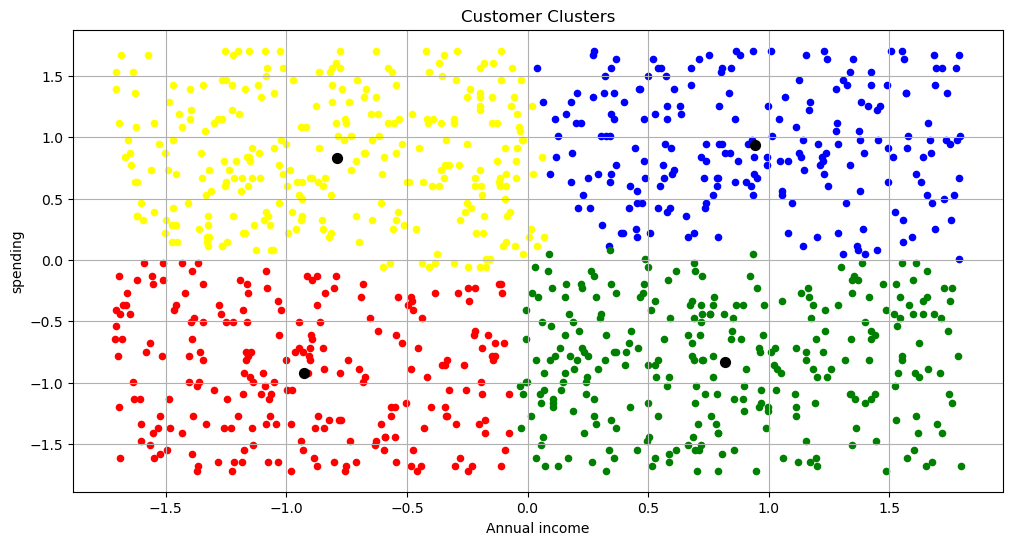

In [48]:
plt.figure(figsize=(12,6))
plt.scatter(x[y==0,0],x[y==0,1],s=20,c='red',label='Cluster 1' )
plt.scatter(x[y==1,0],x[y==1,1],s=20,c='blue',label='Cluster 2' )
plt.scatter(x[y==2,0],x[y==2,1],s=20,c='green',label='Cluster 3' )
plt.scatter(x[y==3,0],x[y==3,1],s=20,c='yellow',label='Cluster 4' )

plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=50,c='black',label='Centroids')

plt.title("Customer Clusters")
plt.xlabel('Annual income')
plt.ylabel('spending')
plt.grid(True)
plt.show()

In [49]:
df=df.drop('cluster',axis=True)

Important feature

<Axes: >

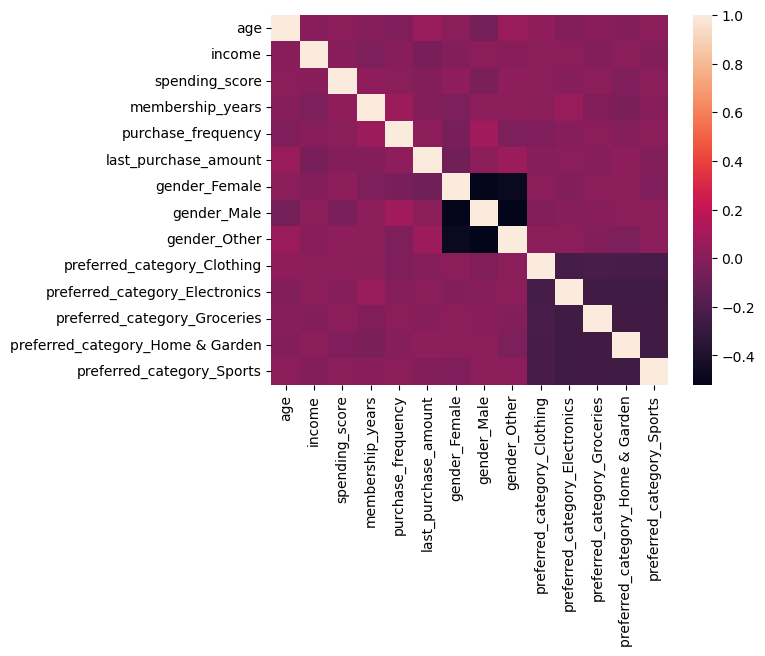

In [50]:
sns.heatmap(df.corr())

In [51]:
wcss=[]
for i in range(2,11):
    kmean=KMeans(n_clusters=i,init="k-means++")
    kmean.fit(_x)
    wcss.append(kmean.inertia_)
    

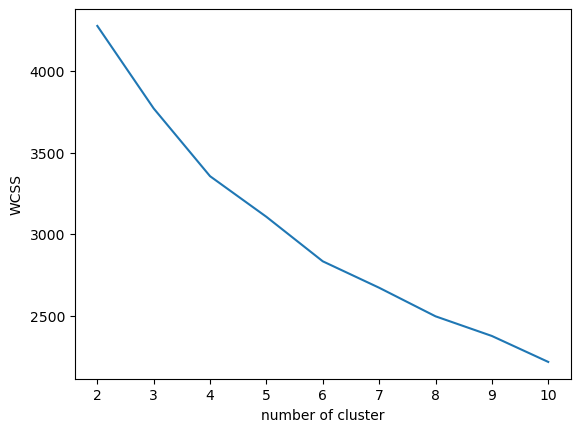

In [52]:
plt.plot(range(2,11),wcss)
plt.xticks(range(2,11))
plt.xlabel("number of cluster")
plt.ylabel("WCSS")
plt.show()

In [53]:
from kneed import KneeLocator
k=KneeLocator(range(2,11),wcss,curve='convex',direction='decreasing')
k.elbow

6

In [54]:
model=KMeans(n_clusters=6,init='k-means++')
model.fit(_x)
_y=model.predict(_x)
_y

array([5, 0, 4, 5, 4, 0, 0, 3, 2, 2, 1, 2, 5, 2, 1, 4, 4, 1, 5, 5, 1, 5,
       3, 5, 2, 0, 1, 1, 5, 1, 1, 5, 0, 5, 2, 1, 0, 3, 0, 0, 0, 4, 0, 3,
       2, 0, 4, 5, 5, 4, 5, 3, 3, 5, 2, 1, 2, 3, 1, 1, 1, 5, 1, 4, 1, 3,
       4, 0, 4, 2, 5, 2, 1, 4, 4, 4, 2, 1, 1, 2, 3, 4, 5, 5, 1, 0, 2, 0,
       1, 5, 0, 3, 4, 4, 5, 1, 4, 5, 3, 0, 1, 5, 0, 4, 0, 3, 5, 2, 0, 2,
       3, 3, 4, 1, 4, 3, 3, 2, 3, 2, 3, 5, 0, 5, 2, 5, 5, 0, 2, 3, 2, 4,
       3, 5, 5, 0, 0, 3, 1, 5, 5, 0, 3, 1, 3, 1, 2, 3, 5, 0, 4, 1, 2, 1,
       3, 3, 2, 2, 3, 0, 4, 3, 0, 2, 0, 2, 5, 5, 5, 2, 0, 1, 3, 5, 5, 3,
       4, 4, 0, 3, 5, 3, 5, 0, 5, 3, 0, 4, 3, 5, 5, 0, 2, 2, 5, 0, 5, 4,
       4, 4, 0, 2, 4, 4, 3, 1, 2, 4, 3, 1, 5, 0, 3, 3, 4, 3, 2, 4, 2, 4,
       4, 2, 3, 1, 4, 5, 2, 2, 5, 2, 0, 4, 0, 1, 1, 5, 2, 3, 3, 3, 5, 3,
       1, 3, 1, 0, 2, 0, 3, 4, 0, 3, 4, 3, 0, 2, 3, 5, 2, 5, 0, 2, 3, 2,
       3, 4, 3, 0, 0, 0, 2, 4, 3, 3, 3, 5, 3, 2, 3, 5, 2, 1, 3, 0, 4, 0,
       3, 0, 3, 5, 2, 2, 2, 2, 3, 0, 4, 0, 2, 3, 1,

Insights

In [55]:
df

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,gender_Female,gender_Male,gender_Other,preferred_category_Clothing,preferred_category_Electronics,preferred_category_Groceries,preferred_category_Home & Garden,preferred_category_Sports
0,38,99342,90,3,24,113,1,0,0,0,0,1,0,0
1,21,78852,60,2,42,41,1,0,0,0,0,0,0,1
2,60,126573,30,2,28,424,1,0,0,1,0,0,0,0
3,40,47099,74,9,5,991,0,0,1,0,0,0,1,0
4,65,140621,21,3,25,347,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,57,112170,57,6,1,313,0,1,0,1,0,0,0,0
996,23,65337,76,10,23,632,0,0,1,0,0,1,0,0
997,23,113097,40,5,42,75,0,1,0,0,0,0,0,1
998,22,113695,63,7,44,505,1,0,0,0,1,0,0,0


In [56]:
df['cluster']=model.labels_
df.groupby('cluster').mean()

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,gender_Female,gender_Male,gender_Other,preferred_category_Clothing,preferred_category_Electronics,preferred_category_Groceries,preferred_category_Home & Garden,preferred_category_Sports
cluster,,,,,,,,,,,,,,
0,35.748503,96539.616766,40.233533,5.616766,40.532934,229.083832,0.311377,0.401198,0.287425,0.173653,0.233533,0.143713,0.215569,0.233533
1,31.886525,85327.773050,21.354610,5.354610,14.553191,578.113475,0.312057,0.390071,0.297872,0.156028,0.241135,0.191489,0.205674,0.205674
2,56.124324,53919.686486,44.005405,5.432432,31.124324,675.356757,0.243243,0.345946,0.410811,0.194595,0.183784,0.232432,0.194595,0.194595
3,43.836735,116043.107143,63.413265,5.673469,31.933673,762.755102,0.290816,0.382653,0.326531,0.163265,0.188776,0.204082,0.224490,0.219388
4,57.324324,116416.581081,52.418919,5.175676,17.351351,269.094595,0.371622,0.297297,0.331081,0.175676,0.250000,0.195946,0.175676,0.202703
5,35.938650,63792.779141,77.466258,5.478528,19.570552,354.711656,0.386503,0.319018,0.294479,0.153374,0.208589,0.220859,0.214724,0.202454


In [57]:

centroids=model.cluster_centers_
total = len(df)
cluster_counts = df['cluster'].value_counts().sort_index()
cluster_counts




cluster
0    167
1    141
2    185
3    196
4    148
5    163
Name: count, dtype: int64

In [58]:
cluster_percent = (cluster_counts / total) * 100
print(cluster_percent.round(2))


cluster
0    16.7
1    14.1
2    18.5
3    19.6
4    14.8
5    16.3
Name: count, dtype: float64


In [59]:
#code snippet
#retrive data from scaled code ,not used here just know
#insight_data=sc.inverse_transform(scaled_data)
#pd.DataFrame(insight_data)

PCA

In [60]:
from sklearn.decomposition import PCA
pca=PCA()
pca_col=pca.fit_transform(scaled_data)

In [61]:
pca_df=pd.DataFrame(pca_col)
pca_x=pca_df[0]
pca_y=pca_df[1]

In [62]:
pca.explained_variance_ratio_


array([1.12823991e-01, 1.08333357e-01, 9.18906133e-02, 9.07067343e-02,
       8.93603561e-02, 8.68592480e-02, 7.63313673e-02, 7.47525736e-02,
       7.08455996e-02, 6.91168568e-02, 6.69653551e-02, 6.20139484e-02,
       3.75886281e-17, 1.42745571e-17])

In [63]:
sum(sorted(pca.explained_variance_ratio_,reverse=True)[:5]) # pca is not used here


0.49311505126280375

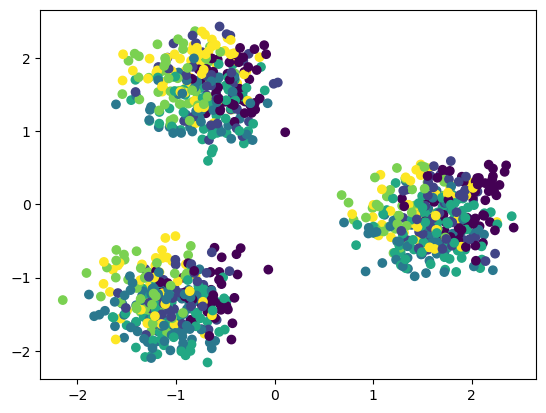

In [64]:
plt.scatter(pca_x,pca_y,c=_y)

Evaluation

2 feature


In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

print("Silhouette Score:", silhouette_score(x,y))
print("Davies-Bouldin Score:", davies_bouldin_score(x, y))
print("Calinski-Harabasz Score:", calinski_harabasz_score(x, y))


Silhouette Score: 0.4189735063734962
Davies-Bouldin Score: 0.7448643286554029
Calinski-Harabasz Score: 1028.0094007871858


Important feature

In [67]:
print("Silhouette Score:", silhouette_score(_x,_y))
print("Davies-Bouldin Score:", davies_bouldin_score(_x,_y))
print("Calinski-Harabasz Score:", calinski_harabasz_score(_x,_y))


Silhouette Score: 0.1630859847635645
Davies-Bouldin Score: 1.493035200373435
Calinski-Harabasz Score: 155.92570148307163


Db scan

In [86]:
db=DBSCAN(eps=0.8,min_samples=7)
dby=db.fit_predict(x)
dby.shape

(1000,)

Text(0.5, 1.0, 'Kmeans with 2 feature')

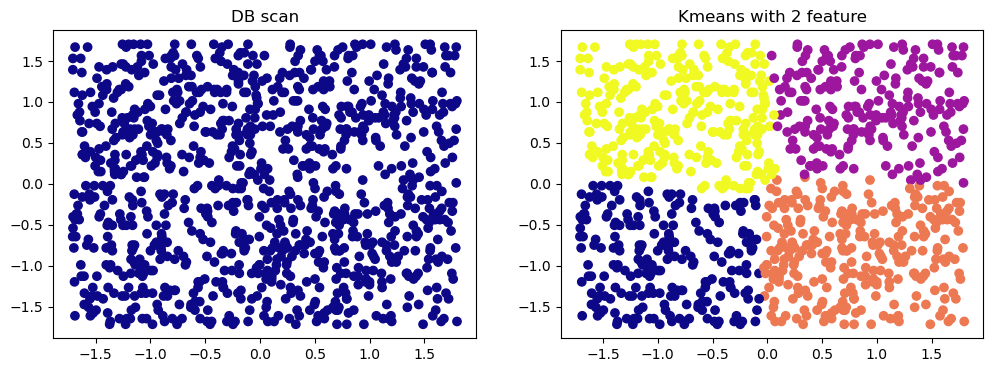

In [87]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(x[:,0],x[:,1],c=dby,cmap='plasma')
plt.title('DB scan')
plt.subplot(1,2,2)
plt.scatter(x[:,0],x[:,1],c=y,cmap='plasma')
plt.title('Kmeans with 2 feature')